In [1]:
import pandas as pd

df = pd.read_csv("./data/used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [2]:
price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)
print(price)

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64


In [32]:
age = df["model_year"].max() - df["model_year"]
print(age)

0       11
1        3
2        2
3        9
4        3
        ..
4004     1
4005     2
4006     2
4007     4
4008     4
Name: model_year, Length: 4009, dtype: int64


In [5]:
milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
mileage = milage.astype(int)
print(milage)

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: object


In [4]:
import matplotlib.pyplot as plt

In [33]:
price2 = age[price < 100000]
mileage2 = mileage[price < 100000]

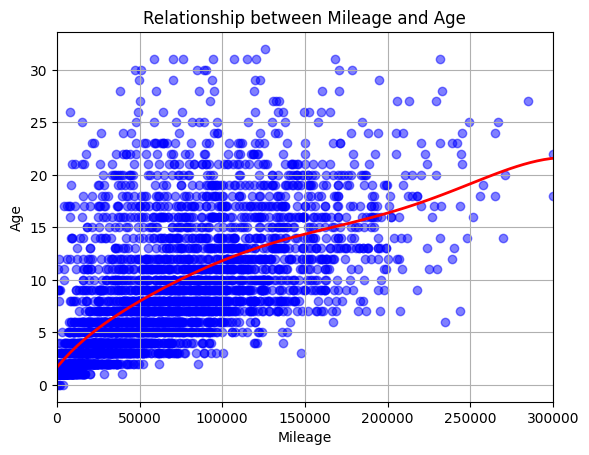

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Trying a higher degree polynomial, for example, a cubic polynomial
model = np.polyfit(mileage2, price2, 7)  # Change degree to 3 for a cubic model
predicted = np.poly1d(model)

# Generate a range of values from min to max mileage for plotting the curve
x_line = np.linspace(min(mileage2), max(mileage2), 100)

# Create the scatter plot
plt.scatter(mileage2, price2, color='blue', alpha=0.5)

# Add the cubic regression line
plt.plot(x_line, predicted(x_line), color='red', linewidth=2)

# Adding labels and title
plt.xlabel('Mileage')
plt.ylabel('Age')
plt.title('Relationship between Mileage and Age')

# Optionally, add a grid
plt.grid(True)
plt.xlim([0,300000])
# Show the plot
plt.show()
